In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Load the dataset into the tool.

In [3]:
ds = pd.read_csv("abalone.csv")
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
ds.shape

(4177, 9)

In [10]:
Age=1.5+ds.Rings
ds["Age"]=Age
ds=ds.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
ds=ds.drop(columns=["Rings"],axis=1)
ds.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [14]:
%pip install seaborn

In [27]:
import seaborn as s

In [26]:
s.displot(ds["Height"], color='darkorange')

In [28]:
import matplotlib.pyplot as plt

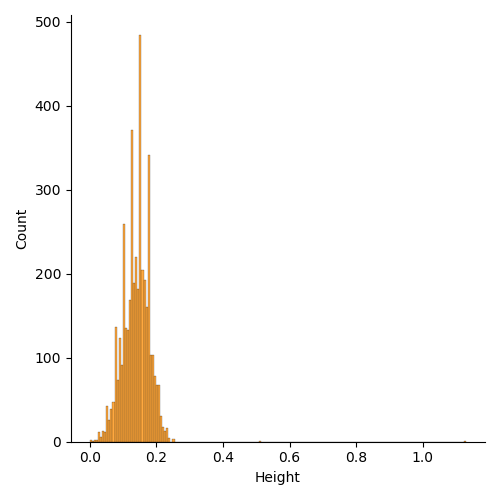

In [29]:
plt.show()

In [30]:
s.displot(ds["Age"], color='darkorange')

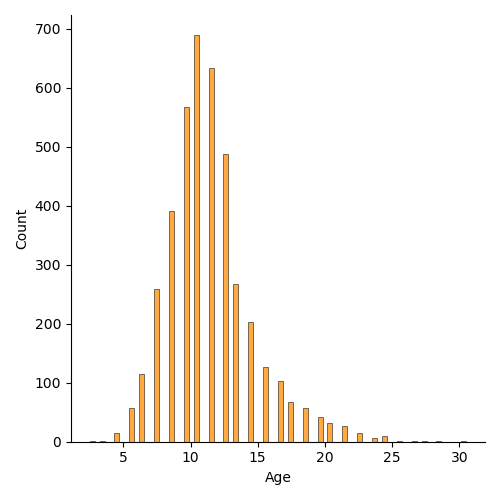

In [31]:
plt.show()

In [33]:
s.barplot(ds["Height"])

<AxesSubplot:>

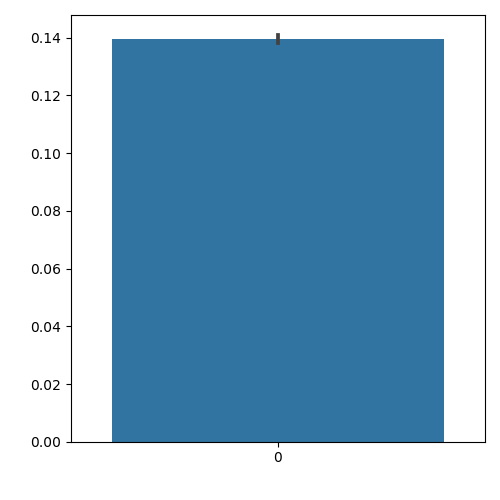

In [34]:
plt.show()

In [40]:
s.boxplot(ds["Height"],color='red')


<AxesSubplot:>

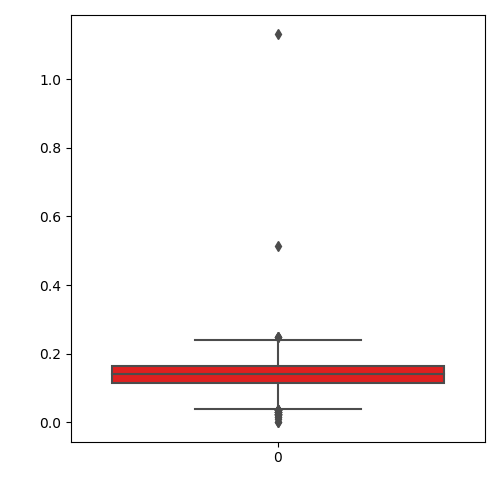

In [41]:
plt.show()

MULTIVARIATE

In [45]:
s.pairplot(data=ds[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]])


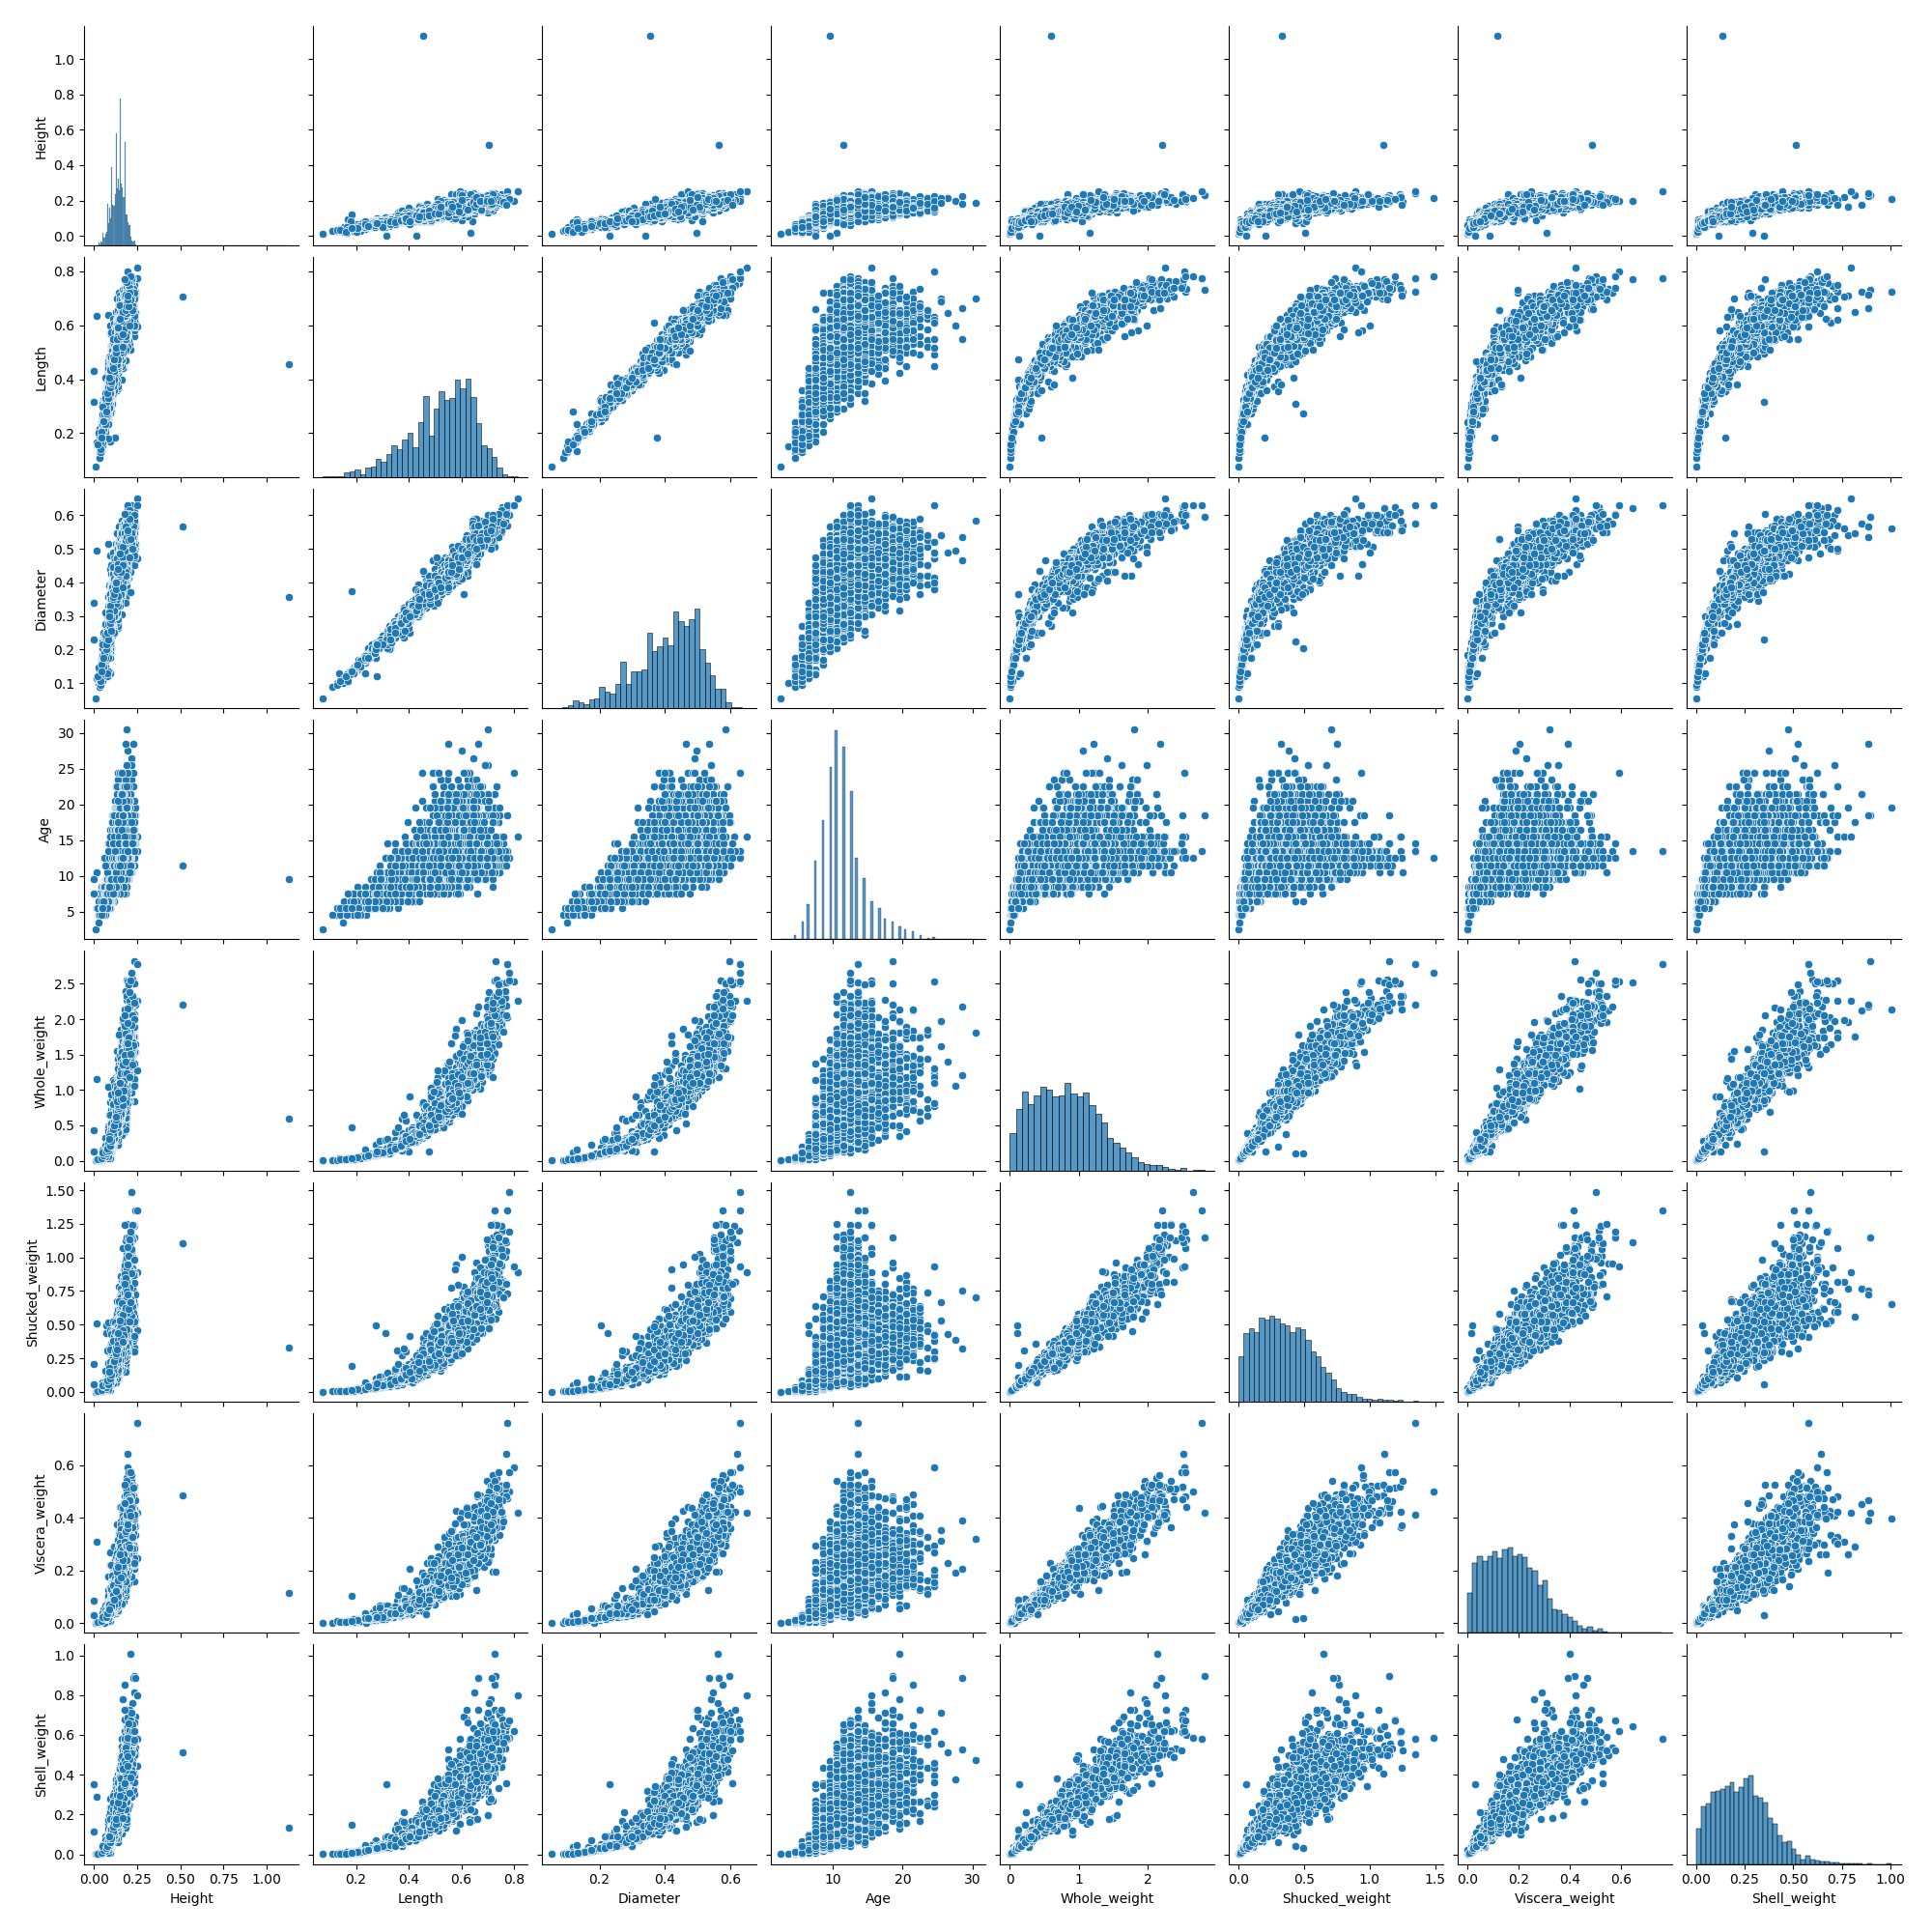

In [46]:
plt.show()

In [47]:
ds.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


5. Check for Missing values and deal with them.

In [48]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

6. Find the outliers and replace them outliers


In [49]:
outliers=ds.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [50]:
a = ds.Age.quantile(0.25)
b = ds.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
ds.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

In [53]:
ds['Age'] = np.where(ds['Age'] < lower_limit, 7, ds['Age'])
s.boxplot(x=ds.Age,showfliers = False)

<AxesSubplot:xlabel='Age'>

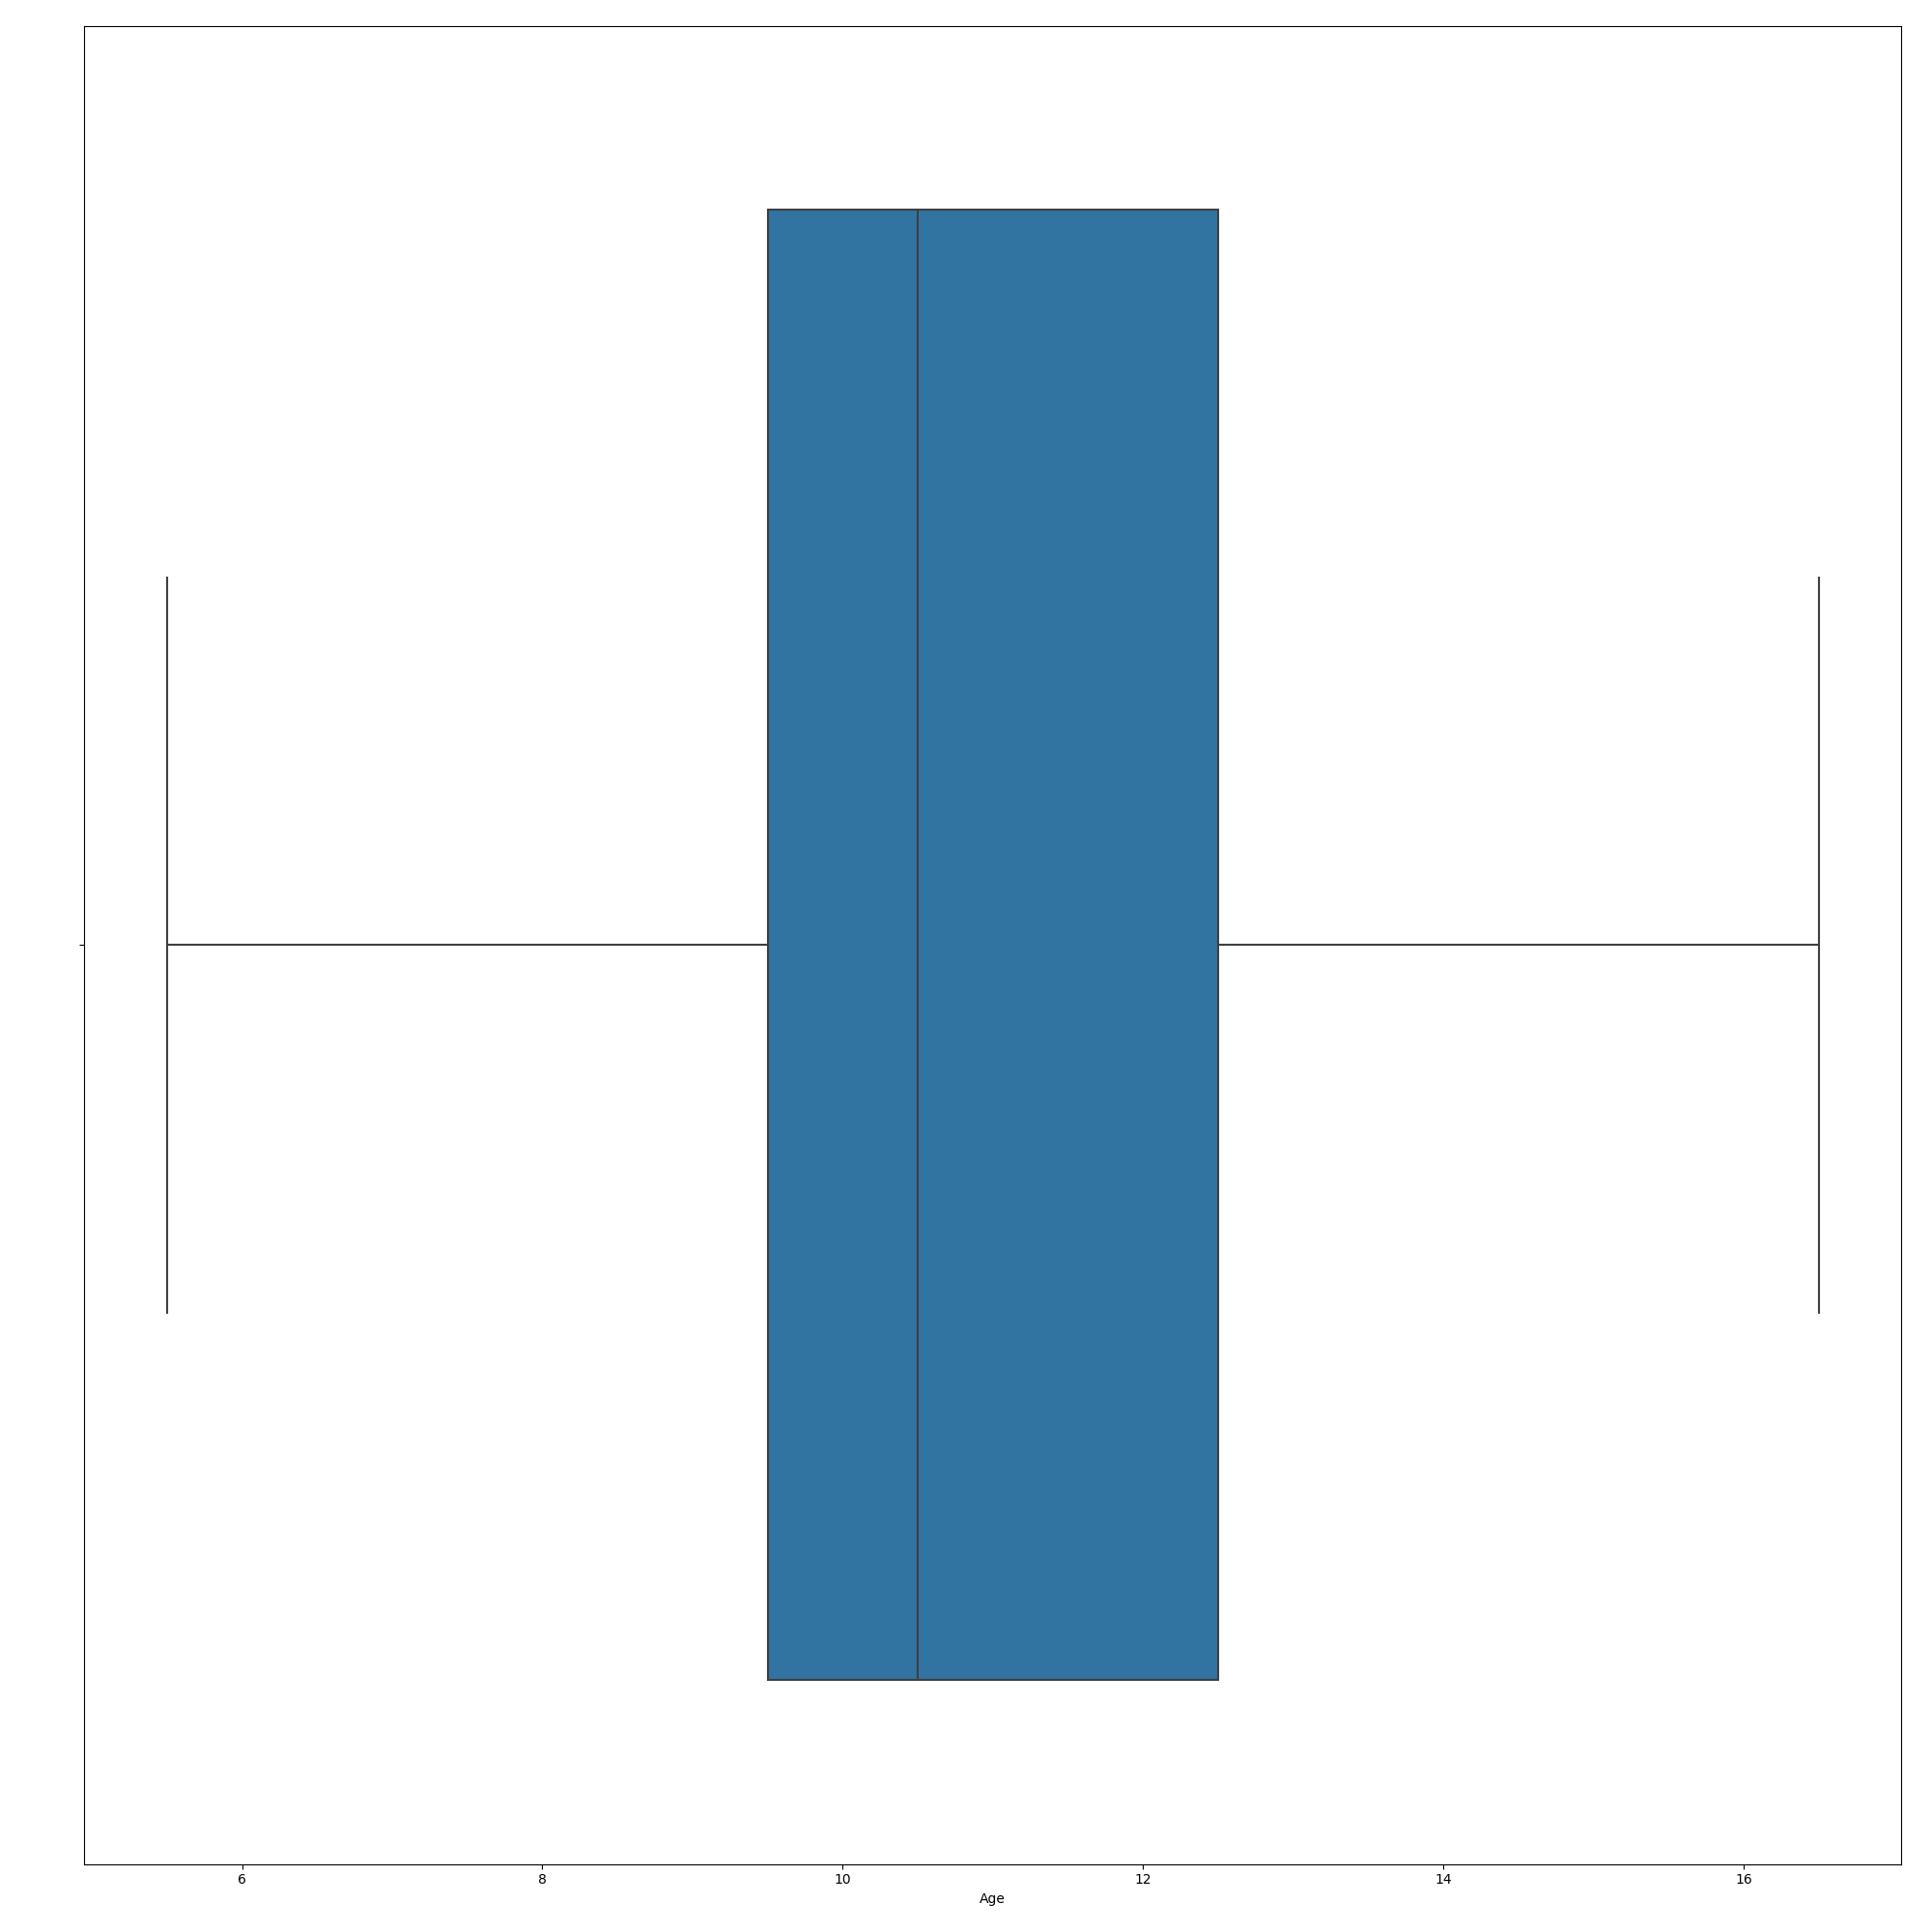

In [54]:
plt.show()

7. Check for Categorical columns and perform encoding.

In [55]:
ds.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [58]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
ds.Sex = l.fit_transform(ds.Sex)

ds.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


8. Split the data into dependent and independent variables


In [59]:
y = ds["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [61]:
x=ds.drop(columns=["Sex"],axis=1)
x.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [62]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


10. Split the data into training and testing


In [63]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [64]:
X_Train.shape,X_Test.shape


((3341, 8), (836, 8))

In [65]:
Y_Train.shape,Y_Test.shape


((3341,), (836,))

In [66]:
X_Train.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [67]:
X_Test.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [68]:
Y_Train.head()


3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int32

In [69]:
Y_Test.head()


668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int32

11. Build the Model


In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [71]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [74]:
y_predict = model.predict(X_Test)


In [73]:
y_predict_train = model.predict(X_Train)


12. Train the Model


In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [76]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))


Training accuracy:  0.983837174498653


13.Test the Model


In [77]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))


Testing accuracy:  0.5430622009569378


14. Measure the performance using Metrics


In [78]:
pd.crosstab(Y_Test,y_predict)


col_0,0,1,2
Sex,,,
0,118,30,101
1,41,213,37
2,119,54,123


In [79]:
print(classification_report(Y_Test,y_predict))


              precision    recall  f1-score   support

           0       0.42      0.47      0.45       249
           1       0.72      0.73      0.72       291
           2       0.47      0.42      0.44       296

    accuracy                           0.54       836
   macro avg       0.54      0.54      0.54       836
weighted avg       0.54      0.54      0.54       836

